# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Categorical Data Cleaning:

In [2]:
# Load the dataset
cleaned_df = pd.read_csv('cleaned_brfss_2023.csv')

In [3]:
# changing: 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'EXERANY2', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'DIABETE4', 'MARITAL', 'EDUCA', 'EMPLOY1', 'INCOME3', 'SMOKE100', 'SMOKDAY2', 'ALCDAY4', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS', 'FLUSHOT7', 'HIVTST7', '_TOTINDA', '_RACEGR3', '_AGEG5YR', '_AGE65YR', '_EDUCAG', '_INCOMG1', '_RFSMOK3'

# changing GENHLTH values: 1: Excellent, 2: Very good, 3: Good, 4: Fair, 5: Poor, 7: Not sure, 9: Refused, Blank: Missing
cleaned_df['GENHLTH'] = cleaned_df['GENHLTH'].replace({1: 'Excellent', 2: 'Very good', 3: 'Good', 4: 'Fair', 5: 'Poor', 7: 'Not sure', 9: 'Refused'})

genhlth_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
cleaned_df['GENHLTH'] = pd.Categorical(cleaned_df['GENHLTH'], categories=genhlth_order, ordered=True)

# changing MENTHLTH values: 88: None, 77: Not sure, 99: Refused
cleaned_df['MENTHLTH'] = cleaned_df['MENTHLTH'].replace({88: 'Not sure', 77: 'Refused', 99: 'Refused'})

# changing PHYSHLTH values: 88: None, 77: Not sure, 99: Refused
cleaned_df['PHYSHLTH'] = cleaned_df['PHYSHLTH'].replace({88: 'Not sure', 77: 'Refused', 99: 'Refused'})

# changing POORHLTH values: 88: None, 77: Not sure, 99: Refused
cleaned_df['POORHLTH'] = cleaned_df['POORHLTH'].replace({88: 'Not sure', 77: 'Refused', 99: 'Refused'})

# changing EXERANY2 values: 1: Yes, 2: No, 7: Not sure, 9: Refused
cleaned_df['EXERANY2'] = cleaned_df['EXERANY2'].replace({1: 'Yes', 2: 'No', 7: 'Not sure', 9: 'Refused'})

# changing CHCSCNC1 values: 1: Yes, 2: No, 7: Not sure, 9: Refused
cleaned_df['CHCSCNC1'] = cleaned_df['CHCSCNC1'].replace({1: 'Yes', 2: 'No', 7: 'Not sure', 9: 'Refused'})

# changing CHCOCNC1 values: 1: Yes, 2: No, 7: Not sure, 9: Refused
cleaned_df['CHCOCNC1'] = cleaned_df['CHCOCNC1'].replace({1: 'Yes', 2: 'No', 7: 'Not sure', 9: 'Refused'})

# changing CHCCOPD3 values: 1: Yes, 2: No, 7: Not sure, 9: Refused
cleaned_df['CHCCOPD3'] = cleaned_df['CHCCOPD3'].replace({1: 'Yes', 2: 'No', 7: 'Not sure', 9: 'Refused'})

# changing DIABETE4 values: 1: Yes, 2: Yes, but female told only during pregnancy, 3: No, 4: No, pre-diabetes or borderline diabetes , 7: Not sure, 9: Refused
cleaned_df['DIABETE4'] = cleaned_df['DIABETE4'].replace({1: 'Yes', 2: 'Yes, but female told only during pregnancy', 3: 'No', 4: 'No, pre-diabetes or borderline diabetes', 7: 'Not sure', 9: 'Refused'})

# changing MARITAL values: 1: Married, 2: Divorced, 3: Widowed, 4: Separated, 5: Never married, 6: A member of an unmarried couple, 9: Refused
cleaned_df['MARITAL'] = cleaned_df['MARITAL'].replace({1: 'Married', 2: 'Divorced', 3: 'Widowed', 4: 'Separated', 5: 'Never married', 6: 'A member of an unmarried couple', 9: 'Refused'})

# changing EDUCA values: 
#   1: Never attended school or only kindergarten, 
#   2: Grades 1 through 8 (Elementary), 
#   3: Grades 9 through 11 (Some high school), 
#   4: Grade 12 or GED (High school graduate), 
#   5: College 1 year to 3 years (Some college or technical school), 
#   6: College 4 years or more (College graduate), 
#   9: Refused
cleaned_df['EDUCA'] = cleaned_df['EDUCA'].replace({1: 'Never attended school or only kindergarten', 2: 'Grades 1 through 8 (Elementary)', 3: 'Grades 9 through 11 (Some high school)', 4: 'Grade 12 or GED (High school graduate)', 5: 'College 1 year to 3 years (Some college or technical school)', 6: 'College 4 years or more (College graduate)', 9: 'Refused'})

educa_order = ['Never attended school or only kindergarten', 'Grades 1 through 8 (Elementary)',
               'Grades 9 through 11 (Some high school)', 'Grade 12 or GED (High school graduate)', 
               'College 1 year to 3 years (Some college or technical school)', 
               'College 4 years or more (College graduate)']

cleaned_df['EDUCA'] = pd.Categorical(cleaned_df['EDUCA'], categories=educa_order, ordered=True)


# changing EMPLOY1 values: 
#   1: Employed for wages, 
#   2: Self-employed,
#   3: Out of work for 1 year or more, 
#   4: Out of work for less than 1 year, 
#   5: A homemaker, 
#   6: A student, 
#   7: Retired, 
#   8: Unable to work, 
#   9: Refused
cleaned_df['EMPLOY1'] = cleaned_df['EMPLOY1'].replace({1: 'Employed for wages', 2: 'Self-employed', 3: 'Out of work for 1 year or more', 4: 'Out of work for less than 1 year', 5: 'A homemaker', 6: 'A student', 7: 'Retired', 8: 'Unable to work', 9: 'Refused'})

# changing INCOME3 values:
#   1: Less than $10,000,
#   2: Less than $15,000
#   3: Less than $20,000
#   4: Less than $25,000
#   5: Less than $35,000
#   7: Less than $50,000
#   8: Less than $75,000
#   9: Less than $100,000
#   10: Less than $150,000
#   11: Less than $200,000
#   12: $200,000 or more
#   77: Not sure
#   99: Refused
cleaned_df['INCOME3'] = cleaned_df['INCOME3'].replace({1: 'Less than $10,000', 2: 'Less than $15,000', 3: 'Less than $20,000', 4: 'Less than $25,000', 5: 'Less than $35,000', 7: 'Less than $50,000', 8: 'Less than $75,000', 9: 'Less than $100,000', 10: 'Less than $150,000', 11: 'Less than $200,000', 12: '$200,000 or more', 77: 'Not sure', 99: 'Refused'})

income_order = ['Less than $10,000', 'Less than $15,000', 'Less than $20,000', 
                'Less than $25,000', 'Less than $35,000', 'Less than $50,000', 
                'Less than $75,000', 'Less than $100,000', 'Less than $150,000', 
                'Less than $200,000', '$200,000 or more']

cleaned_df['INCOME3'] = pd.Categorical(cleaned_df['INCOME3'], categories=income_order, ordered=True)


# changing SMOKE100 values: 1: Yes, 2: No, 7: Not sure, 9: Refused
cleaned_df['SMOKE100'] = cleaned_df['SMOKE100'].replace({1: 'Yes', 2: 'No', 7: 'Not sure', 9: 'Refused'})

# changing SMOKDAY2 values:
#   1: Every day,
#   2: Some days,
#   3: Not at all,
#   7: Not sure,
#   9: Refused
cleaned_df['SMOKDAY2'] = cleaned_df['SMOKDAY2'].replace({1: 'Every day', 2: 'Some days', 3: 'Not at all', 7: 'Not sure', 9: 'Refused'})

# changing ALCDAY4 values:
#   if 101-199: Number of drinks in past week (calculated by number - 100)
#   if 201-299: Number of drinks in past month (calculated by number - 200)
#   777: Not sure
#   888: No drinks in past week
#   999: Refused
#   To better calculate the average number of drinks per day, we will convert the values that are in the range 201-299 to the equivalent number of drinks per week by subtracting 100 and then dividing by 4.34524 (average number of weeks in a month). 
#   We will also convert the values that are in the range 101-199 to the equivalent number of drinks per week by subtrcting 100
cleaned_df['ALCDAY4'] = cleaned_df['ALCDAY4'].apply(lambda x: (x - 200) / 4.34524 if x >= 201 and x <= 299 else x - 100 if x >= 101 and x <= 199 else x)

# changing AVEDRNK3 values:
#   if 1- 76: Number of drinks per day
#   77: Not sure
#   88: None
#   99: Refused
cleaned_df['AVEDRNK3'] = cleaned_df['AVEDRNK3'].replace({77: 'Not sure', 88: 'None', 99: 'Refused'})

# changing DRNK3GE5 values:
#   if 1-76: Number of times in past 30 days drank 5 or more drinks (men) or 4 or more drinks (women)
#   77: Not sure
#   88: None
#   99: Refused
cleaned_df['DRNK3GE5'] = cleaned_df['DRNK3GE5'].replace({77: 'Not sure', 88: 'None', 99: 'Refused'})


# changing MAXDRNKS values:
#   if 1-76: Max num of drinks on any occasion
#   77: Not sure
#   88: Invalid response
#   99: Refused
cleaned_df['MAXDRNKS'] = cleaned_df['MAXDRNKS'].replace({77: 'Not sure', 88: 'Invalid response', 99: 'Refused'})

# changing FLUSHOT7 values: 1: Yes, 2: No, 7: Not sure, 9: Refused
cleaned_df['FLUSHOT7'] = cleaned_df['FLUSHOT7'].replace({1: 'Yes', 2: 'No', 7: 'Not sure', 9: 'Refused'})

# changing HIVTST7 values: 1: Yes, 2: No, 7: Not sure, 9: Refused
cleaned_df['HIVTST7'] = cleaned_df['HIVTST7'].replace({1: 'Yes', 2: 'No', 7: 'Not sure', 9: 'Refused'})

# changing _TOTINDA values: 1: Yes, 2: No, 9: Not sure/Refused/Missing
cleaned_df['_TOTINDA'] = cleaned_df['_TOTINDA'].replace({1: 'Yes', 2: 'No', 9: 'Not sure/Refused/Missing'})

# changing _RACEGR3 values: 
#   1: White only, Non-Hispanic, 
#   2: Black only, Non-Hispanic,
#   3: Other race only, Non-Hispanic,
#   4: Multiracial, Non-Hispanic,
#   5: Hispanic,
#   9: Not sure/Refused
cleaned_df['_RACEGR3'] = cleaned_df['_RACEGR3'].replace({1: 'White only, Non-Hispanic', 2: 'Black only, Non-Hispanic', 3: 'Other race only, Non-Hispanic', 4: 'Multiracial, Non-Hispanic', 5: 'Hispanic', 9: 'Not sure/Refused'})

# changing _AGEG5YR values:
#   1: 18-24 years,
#   2: 25-29 years,
#   3: 30-34 years,
#   4: 35-39 years,
#   5: 40-44 years,
#   6: 45-49 years,
#   7: 50-54 years,
#   8: 55-59 years,
#   9: 60-64 years,
#   10: 65-69 years,
#   11: 70-74 years,
#   12: 75-79 years,
#   13: 80 or older
#   14: Not sure/Refused/Missing
cleaned_df['_AGEG5YR'] = cleaned_df['_AGEG5YR'].replace({1: '18-24 years', 2: '25-29 years', 3: '30-34 years', 4: '35-39 years', 5: '40-44 years', 6: '45-49 years', 7: '50-54 years', 8: '55-59 years', 9: '60-64 years', 10: '65-69 years', 11: '70-74 years', 12: '75-79 years', 13: '80 or older', 14: 'Not sure/Refused/Missing'})

age_order = ['18-24 years', '25-29 years', '30-34 years', '35-39 years', '40-44 years',
             '45-49 years', '50-54 years', '55-59 years', '60-64 years', '65-69 years',
             '70-74 years', '75-79 years', '80 or older']

cleaned_df['_AGEG5YR'] = pd.Categorical(cleaned_df['_AGEG5YR'], categories=age_order, ordered=True)

# changing _AGE65YR values: 1: Age 18 to 64, 2: Age 65 or older, 9: Not sure/Refused/Missing
cleaned_df['_AGE65YR'] = cleaned_df['_AGE65YR'].replace({1: 'Age 18 to 64', 2: 'Age 65 or older', 9: 'Not sure/Refused/Missing'})

# changing _EDUCAG values:
#   1: Did not graduate High School
#   2: Graduated High School
#   3: Attended College or Technical School
#   4: Graduated from College or Technical School
#   9: Not sure/Refused/Missing
cleaned_df['_EDUCAG'] = cleaned_df['_EDUCAG'].replace({1: 'Did not graduate High School', 2: 'Graduated High School', 3: 'Attended College or Technical School', 4: 'Graduated from College or Technical School', 9: 'Not sure/Refused/Missing'})

# changing _INCOMG1 values:
#   1: Less than $15,000
#   2: $15,000 - $25,000
#   3: $25,000 - $35,000
#   4: $35,000 - $50,000
#   5: $50,000 - $100,000
#   6: $100,000 - $200,000
#   7: $200,000 or more
#   9: Not sure/Refused/Missing
cleaned_df['_INCOMG1'] = cleaned_df['_INCOMG1'].replace({1: 'Less than $15,000', 2: '$15,000 - $25,000', 3: '$25,000 - $35,000', 4: '$35,000 - $50,000', 5: '$50,000 - $100,000', 6: '$100,000 - $200,000', 7: '$200,000 or more', 9: 'Not sure/Refused/Missing'})

# changing _RFSMOK3 values:
#   1: Not a current smoker
#   2: Current smoker
#   9: Not sure/Refused/Missing
cleaned_df['_RFSMOK3'] = cleaned_df['_RFSMOK3'].replace({1: 'Not a current smoker', 2: 'Current smoker', 9: 'Not sure/Refused/Missing'})

rfsmok_order = ['Not a current smoker', 'Current smoker']
cleaned_df['_RFSMOK3'] = pd.Categorical(cleaned_df['_RFSMOK3'], categories=rfsmok_order, ordered=True)

# Set non-numeric responses to NaN for relevant health columns
for col in ['MENTHLTH', 'PHYSHLTH', 'POORHLTH', 'ALCDAY4', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS']:
    cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')

In [4]:
def replace_with_nan(df, cols, values):
    for col in cols:
        df[col] = df[col].replace(values, np.nan)
    return df

# Columns where non-informative responses should be converted to NaN
non_informative_values = ['Not sure', 'Refused', 'Don\'t know/Refused/Missing']

# Replace non-informative values with NaN
cols_to_replace_nan = ['GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'POORHLTH', 'EXERANY2', 'CHCSCNC1', 'CHCOCNC1', 
                       'CHCCOPD3', 'DIABETE4', 'MARITAL', 'EDUCA', 'EMPLOY1', 'INCOME3', 'SMOKE100', 
                       'SMOKDAY2', 'ALCDAY4', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS', 'FLUSHOT7', 'HIVTST7', 
                       '_TOTINDA', '_RACEGR3', '_AGEG5YR', '_AGE65YR', '_EDUCAG', '_INCOMG1', '_RFSMOK3']

cleaned_df = replace_with_nan(cleaned_df, cols_to_replace_nan, non_informative_values)


# Set columns to numeric if they contain numeric values and NaNs for non-informative entries
numeric_cols = ['MENTHLTH', 'PHYSHLTH', 'POORHLTH', 'ALCDAY4', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS']
cleaned_df[numeric_cols] = cleaned_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Quick check to see unique values across each column after cleaning
for col in cleaned_df.columns:
    print(f"Unique values in {col}: {cleaned_df[col].unique()}\n")

Unique values in GENHLTH: ['Very good', 'Fair', 'Good', 'Poor', 'Excellent', NaN]
Categories (5, object): ['Excellent' < 'Very good' < 'Good' < 'Fair' < 'Poor']

Unique values in PHYSHLTH: [nan  6.  2.  8.  1.  5.  4. 30. 15. 21. 10. 25. 14.  7. 20.  3. 12. 26.
  9. 24. 18. 13. 28. 23. 16. 17. 11. 29. 27. 22. 19.]

Unique values in MENTHLTH: [nan  2.  3. 10. 25.  5. 30. 20. 15. 12.  4.  1.  6. 21. 14.  7. 29.  8.
 18. 16. 17.  9. 28. 13. 22. 11. 24. 27. 23. 26. 19.]

Unique values in POORHLTH: [nan  1. 30. 25.  9.  5. 14.  2.  3. 10. 15.  7.  8. 20.  4. 28.  6. 18.
 13. 12. 16. 29. 26. 21. 23. 22. 27. 19. 11. 17. 24.]

Unique values in EXERANY2: ['No' 'Yes' nan]

Unique values in CHCSCNC1: ['No' 'Yes' nan]

Unique values in CHCOCNC1: ['No' 'Yes' nan]

Unique values in CHCCOPD3: ['No' 'Yes' nan]

Unique values in DIABETE4: ['Yes' 'No' 'Yes, but female told only during pregnancy' nan
 'No, pre-diabetes or borderline diabetes']

Unique values in MARITAL: ['Married' 'Divorced' 'Widowed' 'A

In [5]:
# adding variable labels for 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'EXERANY2', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'DIABETE4', 'MARITAL', 'EDUCA', 'EMPLOY1', 'INCOME3', 'SMOKE100', 'SMOKDAY2', 'ALCDAY4', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS', 'FLUSHOT7', 'HIVTST7', '_TOTINDA', '_RACEGR3', '_AGEG5YR', '_AGE65YR', '_EDUCAG', '_INCOMG1', '_RFSMOK3'


var_labels = {
    'GENHLTH': 'General health',
    'PHYSHLTH': 'Number of Days Physical Health Not Good',
    'MENTHLTH': 'Number of Days Mental Health Not Good',
    'POORHLTH': 'Poor Physical or Mental Health',
    'EXERANY2': 'Exercise in the past 30 days',
    'CHCSCNC1': 'Ever told you had skin cancer',
    'CHCOCNC1': 'Ever told you had cancer (excluding skin cancer)',
    'CHCCOPD3': 'Ever told you had C.O.P.D. emphysema or chronic bronchitis?',
    'DIABETE4': 'Ever told you had diabetes',
    'MARITAL': 'Marital status',
    'EDUCA': 'Education level',
    'EMPLOY1': 'Employment status',
    'INCOME3': 'Income level',
    'SMOKE100': ' Smoked at Least 100 Cigarettes',
    'SMOKDAY2': 'Frequency of Days Now Smoking',
    'ALCDAY4': 'Days drink alcohol in the past 30 days',
    'AVEDRNK3': 'Avg alcoholic drinks per day in past 30',
    'DRNK3GE5': 'Binge drinking',
    'MAXDRNKS': 'Maximum number of drinks in past month',
    'FLUSHOT7': 'Adult flu shot/spray past 12 mos',
    'HIVTST7': 'Ever tested H.I.V.',
    '_TOTINDA': 'Adults who reported doing physical activity or exercise during the past 30 days other than their regular job',
    '_RACEGR3': ' Five-level race/ethnicity category',
    '_AGEG5YR': ' Fourteen-level age category',
    '_AGE65YR': ' Two-level age category',
    '_EDUCAG': ' Level of education completed',
    '_INCOMG1': ' Income categories',
    '_RFSMOK3': ' Is a current smoker?'
}

# Exclude Refused and Not sure in MENTHLTH
cleaned_df = cleaned_df[~cleaned_df['MENTHLTH'].isin(['Refused', 'Not sure'])]
cleaned_df['_AGEG5YR'] = pd.Categorical(cleaned_df['_AGEG5YR'], categories=age_order, ordered=True)

# Plotting:

In [6]:
selected_colors = [
    "#FFEA85",  # Pineapple Soda
    "#F698DB",  # Berry Pop
    "#E1EEAF",  # Palm Leaf
    "#FFD3E4",  # Cherry Blossom
    "#92D1FF",  # Pool Day
    "#FFD058",  # Lemonade Stand
    "#AFDFEE",  # Blue Lagoon
    "#FFBDB4",  # Peach Smoothie
    "#F1EBE4",  # Coconut Milk
    "#F72967",  # Raspberry Sorbet
    "#4BC6D7",  # Splish Splash
    "#BCACDD"   # Fresh Lavender
]

boolean_colors = ["#E1EEAF", "#F698DB"]

color_palette = dict(zip(genhlth_order, selected_colors))

/var/folders/jq/t300n9xj6s9f_tfkr257bydw0000gn/T/ipykernel_41177/1550023760.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GENHLTH', y='MENTHLTH', data=cleaned_df, order=genhlth_order, palette=genhlth_palette)
/var/folders/jq/t300n9xj6s9f_tfkr257bydw0000gn/T/ipykernel_41177/1550023760.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0.95)` for the same effect.

  sns.pointplot(x='GENHLTH', y='MENTHLTH', data=cleaned_df, order=genhlth_order, ci = 0.95, color='black',


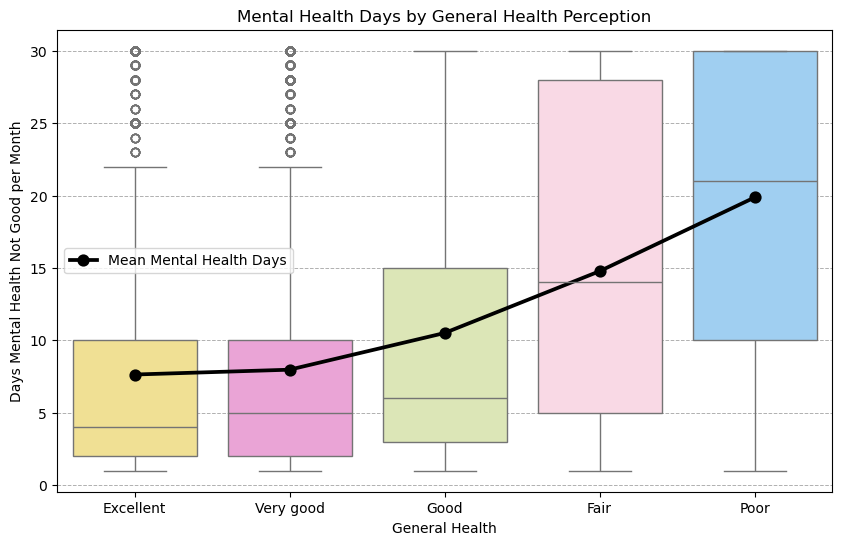

In [7]:
genhlth_palette = {
    'Excellent': "#FFEA85", 
    'Very good': "#F698DB", 
    'Good': "#E1EEAF",      
    'Fair': "#FFD3E4",      
    'Poor': "#92D1FF"       
}

genhlth_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']

plt.figure(figsize=(10, 6))
sns.boxplot(x='GENHLTH', y='MENTHLTH', data=cleaned_df, order=genhlth_order, palette=genhlth_palette)

#confidence intervals
sns.pointplot(x='GENHLTH', y='MENTHLTH', data=cleaned_df, order=genhlth_order, ci = 0.95, color='black', 
              markers='o', linestyles='-', label='Mean Mental Health Days')

plt.title('Mental Health Days by General Health Perception')
plt.xlabel('General Health')
plt.ylabel('Days Mental Health Not Good per Month')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend()  
plt.show()





H0:  Mean number of days mental health is not good is the same across all general categories.

H1: At least one category is different

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('MENTHLTH ~ C(GENHLTH)', data=cleaned_df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                  sum_sq        df            F  PR(>F)
C(GENHLTH)  2.106439e+06       4.0  5920.749069     0.0
Residual    1.492359e+07  167788.0          NaN     NaN


Test Statistic:
F: 5920.74
P = 0

Decision: 
Reject H0

Conclusion: Since P is less than 0.05 we have enough evidence to reject the null hypothesis. 

/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_95776/4081253056.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='MENTHLTH', y='_AGEG5YR', data=cleaned_df, order=age_order, palette=age_palette)


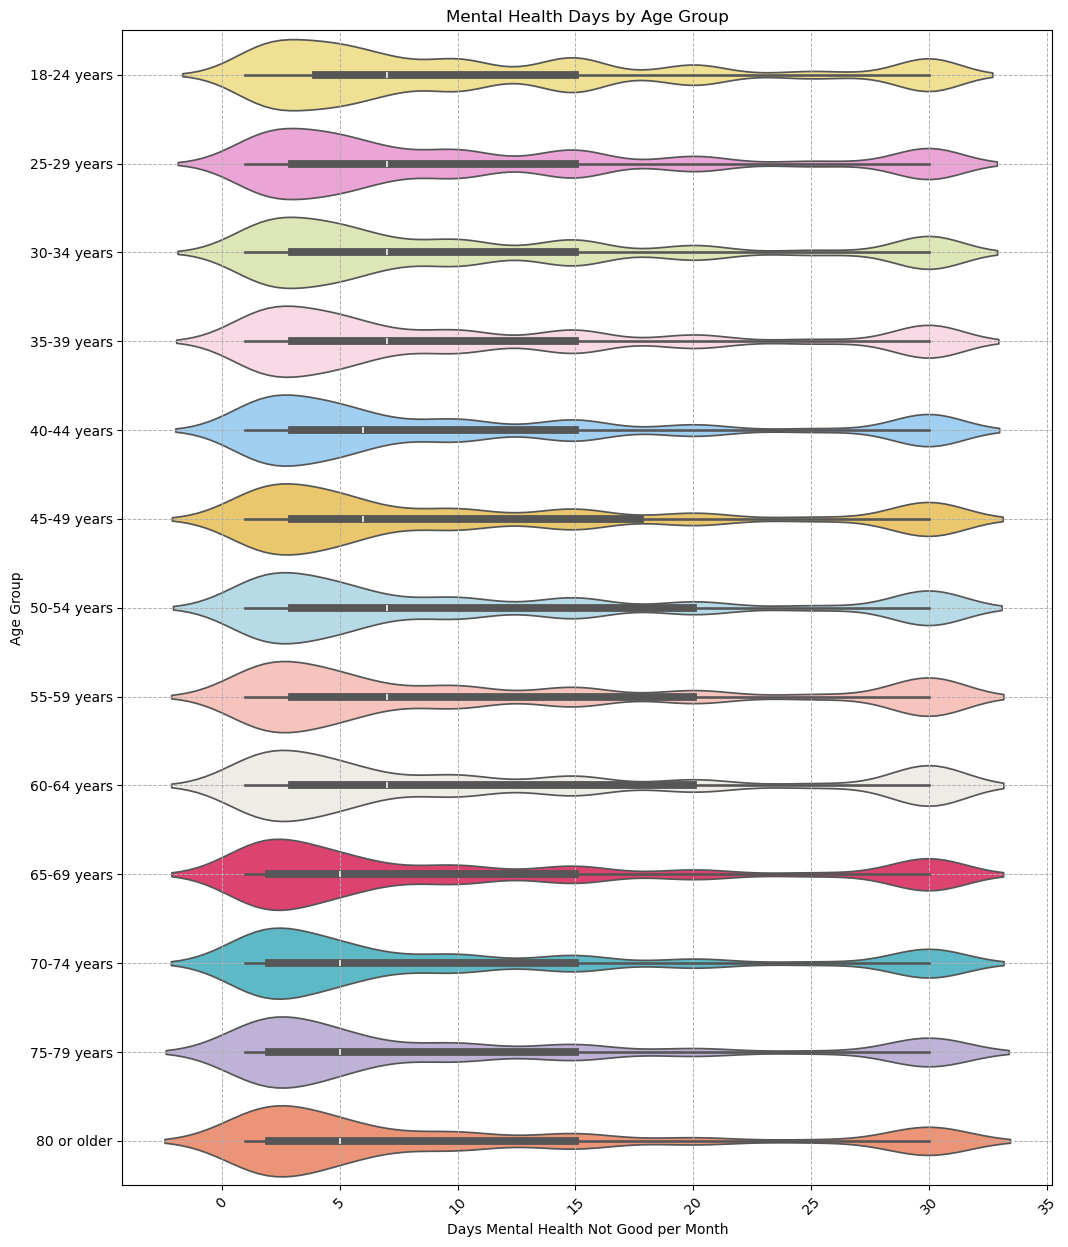

In [19]:
age_palette = {
    '18-24 years': "#FFEA85", 
    '25-29 years': "#F698DB",
    '30-34 years': "#E1EEAF",
    '35-39 years': "#FFD3E4",
    '40-44 years': "#92D1FF",
    '45-49 years': "#FFD058",
    '50-54 years': "#AFDFEE",
    '55-59 years': "#FFBDB4",
    '60-64 years': "#F1EBE4",
    '65-69 years': "#F72967",
    '70-74 years': "#4BC6D7",
    '75-79 years': "#BCACDD",
    '80 or older': "#FF8A65"
}

# Order for age categories
age_order = [
    '18-24 years', '25-29 years', '30-34 years', '35-39 years', '40-44 years',
    '45-49 years', '50-54 years', '55-59 years', '60-64 years', '65-69 years',
    '70-74 years', '75-79 years', '80 or older'
]

# Violin plot for MENTHLTH across age groups with custom palette
plt.figure(figsize=(12, 15))  # Adjusted size to better fit age categories
sns.violinplot(x='MENTHLTH', y='_AGEG5YR', data=cleaned_df, order=age_order, palette=age_palette)

# Customize plot aesthetics
plt.title('Mental Health Days by Age Group')
plt.ylabel('Age Group')
plt.xlabel('Days Mental Health Not Good per Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', linewidth=0.7)  # Light grid on y-axis
plt.grid(axis='x', linestyle='--', linewidth=0.7)  # Light grid on x-axis

plt.show()


/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_95776/3681878603.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette=boolean_colors)
/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_95776/3681878603.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


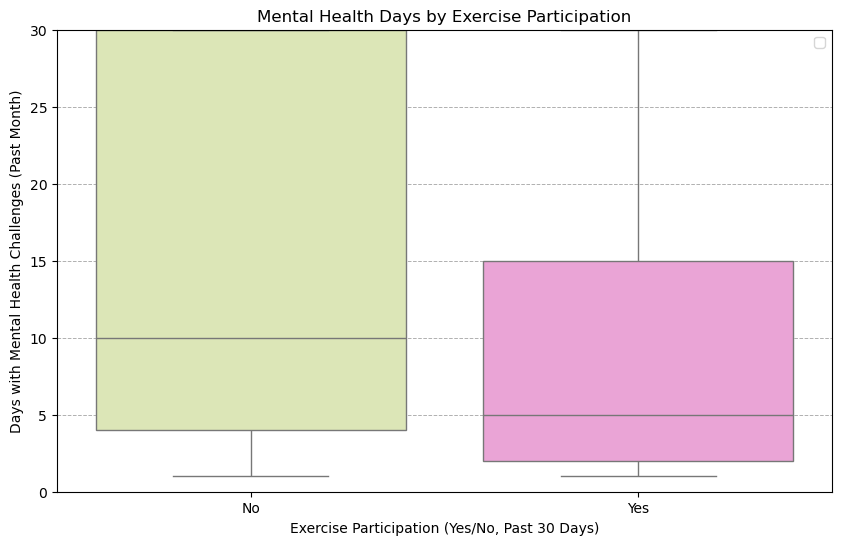

/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_95776/3681878603.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette=boolean_colors)
/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_95776/3681878603.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


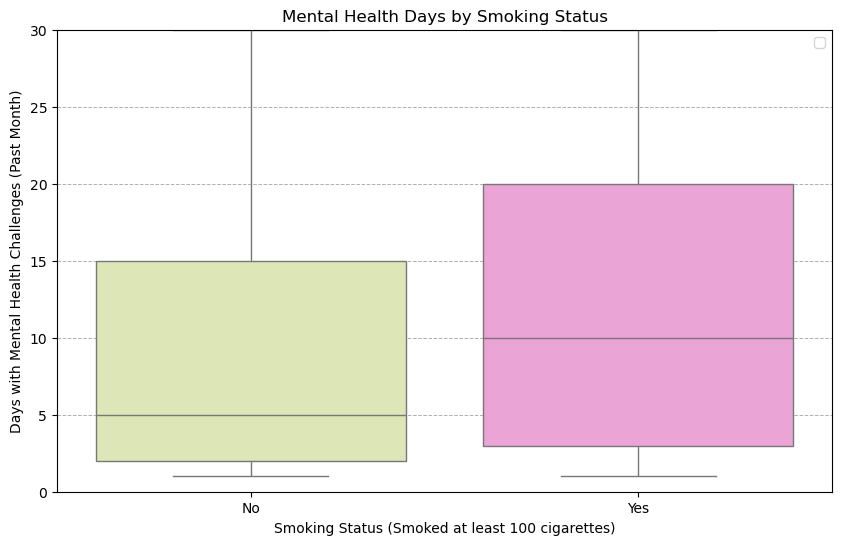

In [20]:
def enhanced_boxplot(data, x, y, title, xlabel, ylabel, palette=None):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x, y=y, data=data, palette=boolean_colors)

    # Set y-axis limits if desired
    plt.ylim(0, 30)

    # Add grid, title, labels, and legend
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    
    plt.show()


# Plot for Exercise Participation
enhanced_boxplot(
    data=cleaned_df,
    x='EXERANY2',
    y='MENTHLTH',
    title='Mental Health Days by Exercise Participation',
    xlabel='Exercise Participation (Yes/No, Past 30 Days)',
    ylabel='Days with Mental Health Challenges (Past Month)',
    palette=selected_colors
)

# Plot for Smoking Status
enhanced_boxplot(
    data=cleaned_df,
    x='SMOKE100',
    y='MENTHLTH',
    title='Mental Health Days by Smoking Status',
    xlabel='Smoking Status (Smoked at least 100 cigarettes)',
    ylabel='Days with Mental Health Challenges (Past Month)',
    palette=selected_colors
)

/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_95776/653290302.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_means = cleaned_df.groupby('INCOME3')['MENTHLTH'].mean().reindex(income_order)
/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_95776/653290302.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='INCOME3', y='MENTHLTH', data=cleaned_df, order=income_order, palette=income_palette)


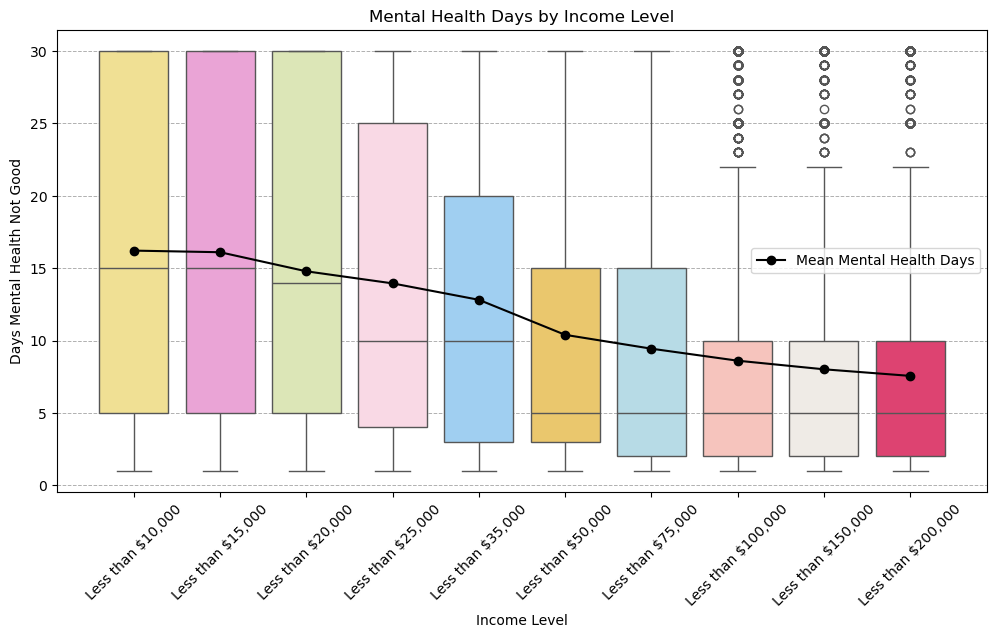

In [21]:
income_palette = {
    'Less than $10,000': "#FFEA85",
    'Less than $15,000': "#F698DB",
    'Less than $20,000': "#E1EEAF",
    'Less than $25,000': "#FFD3E4",
    'Less than $35,000': "#92D1FF",
    'Less than $50,000': "#FFD058",
    'Less than $75,000': "#AFDFEE",
    'Less than $100,000': "#FFBDB4",
    'Less than $150,000': "#F1EBE4",
    'Less than $200,000': "#F72967",
    '$200,000 or more': "#4BC6D7"
}

income_order = [
    'Less than $10,000', 'Less than $15,000', 'Less than $20,000', 'Less than $25,000',
    'Less than $35,000', 'Less than $50,000', 'Less than $75,000', 'Less than $100,000',
    'Less than $150,000', 'Less than $200,000', '$200,000 or more'
]

income_means = cleaned_df.groupby('INCOME3')['MENTHLTH'].mean().reindex(income_order)

plt.figure(figsize=(12, 6))
sns.boxplot(x='INCOME3', y='MENTHLTH', data=cleaned_df, order=income_order, palette=income_palette)
plt.plot(range(len(income_order)), income_means, color='black', marker='o', linestyle='-', label='Mean Mental Health Days')
plt.title('Mental Health Days by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Days Mental Health Not Good')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend()
plt.show()


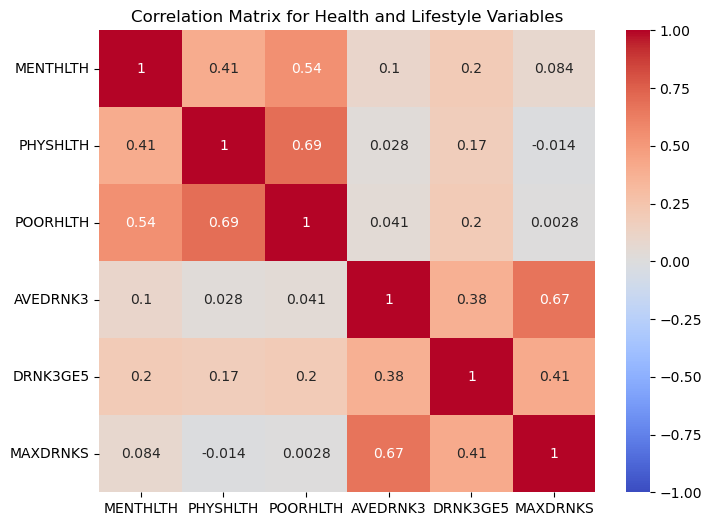

In [12]:
# Selecting numeric columns for correlation
numeric_columns = ['MENTHLTH', 'PHYSHLTH', 'POORHLTH', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS']
corr_matrix = cleaned_df[numeric_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Health and Lifestyle Variables')
plt.show()


In [13]:
# Frequency counts for each category
for col in ['GENHLTH', 'EXERANY2', 'SMOKE100', '_AGEG5YR', 'INCOME3', 'EMPLOY1']:
    print(f"\nFrequency for {var_labels[col]}:")
    print(cleaned_df[col].value_counts())



Frequency for General health:
GENHLTH
Good         144209
Very good    142115
Excellent     63410
Fair          61955
Poor          20372
Name: count, dtype: int64

Frequency for Exercise in the past 30 days:
EXERANY2
Yes    325227
No     106845
Name: count, dtype: int64

Frequency for  Smoked at Least 100 Cigarettes:
SMOKE100
No     251981
Yes    158774
Name: count, dtype: int64

Frequency for  Fourteen-level age category:
_AGEG5YR
65-69 years    46099
70-74 years    43533
60-64 years    41974
80 or older    38869
75-79 years    34543
55-59 years    34219
50-54 years    31291
40-44 years    28463
35-39 years    27153
45-49 years    27070
18-24 years    26280
30-34 years    24803
25-29 years    21247
Name: count, dtype: int64

Frequency for Income level:
INCOME3
Less than $50,000     57896
Less than $100,000    52284
Less than $75,000     49131
Less than $35,000     38508
Less than $200,000    26770
Less than $150,000    24353
Less than $25,000     18202
Less than $20,000     12867
Le

/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_95776/4057120426.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  edu_means = cleaned_df.groupby('EDUCA')['MENTHLTH'].mean().reindex(edu_order)
/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_95776/4057120426.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='EDUCA', x='MENTHLTH', data=cleaned_df, palette=edu_palette, order=edu_order)


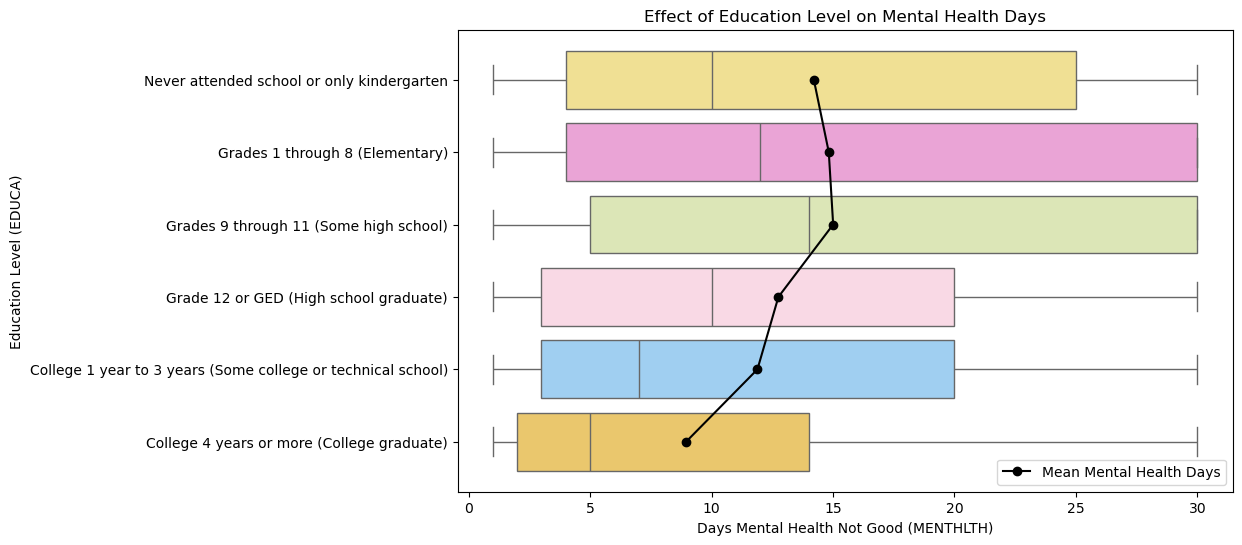

In [24]:
edu_palette = {
    'Never attended school or only kindergarten': "#FFEA85",
    'Grades 1 through 8 (Elementary)': "#F698DB",
    'Grades 9 through 11 (Some high school)': "#E1EEAF",
    'Grade 12 or GED (High school graduate)': "#FFD3E4",
    'College 1 year to 3 years (Some college or technical school)': "#92D1FF",
    'College 4 years or more (College graduate)': "#FFD058"
}

edu_order = [
    'Never attended school or only kindergarten', 
    'Grades 1 through 8 (Elementary)', 
    'Grades 9 through 11 (Some high school)', 
    'Grade 12 or GED (High school graduate)', 
    'College 1 year to 3 years (Some college or technical school)', 
    'College 4 years or more (College graduate)'
]

edu_means = cleaned_df.groupby('EDUCA')['MENTHLTH'].mean().reindex(edu_order)

plt.figure(figsize=(10, 6))
sns.boxplot(y='EDUCA', x='MENTHLTH', data=cleaned_df, palette=edu_palette, order=edu_order)
plt.plot(edu_means.values, range(len(edu_order)), color='black', marker='o', linestyle='-', label='Mean Mental Health Days')
plt.title('Effect of Education Level on Mental Health Days')
plt.ylabel('Education Level (EDUCA)')
plt.xlabel('Days Mental Health Not Good (MENTHLTH)')
plt.legend()
plt.show()


/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_95776/2536814503.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genhlth_means = cleaned_df.groupby('GENHLTH')['MENTHLTH'].mean().reindex(genhlth_order)
/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_95776/2536814503.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GENHLTH', y='MENTHLTH', data=cleaned_df, palette=genhlth_palette, order=genhlth_order)


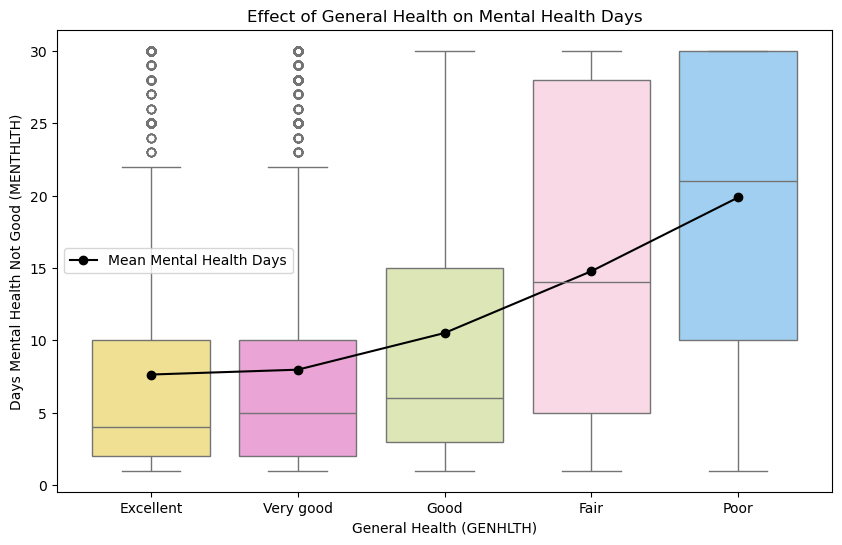

In [25]:
genhlth_palette = {
    'Excellent': "#FFEA85",
    'Very good': "#F698DB",
    'Good': "#E1EEAF",
    'Fair': "#FFD3E4",
    'Poor': "#92D1FF"
}

genhlth_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']

genhlth_means = cleaned_df.groupby('GENHLTH')['MENTHLTH'].mean().reindex(genhlth_order)

plt.figure(figsize=(10, 6))
sns.boxplot(x='GENHLTH', y='MENTHLTH', data=cleaned_df, palette=genhlth_palette, order=genhlth_order)
plt.plot(range(len(genhlth_order)), genhlth_means, color='black', marker='o', linestyle='-', label='Mean Mental Health Days')
plt.title('Effect of General Health on Mental Health Days')
plt.xlabel('General Health (GENHLTH)')
plt.ylabel('Days Mental Health Not Good (MENTHLTH)')
plt.legend()
plt.show()


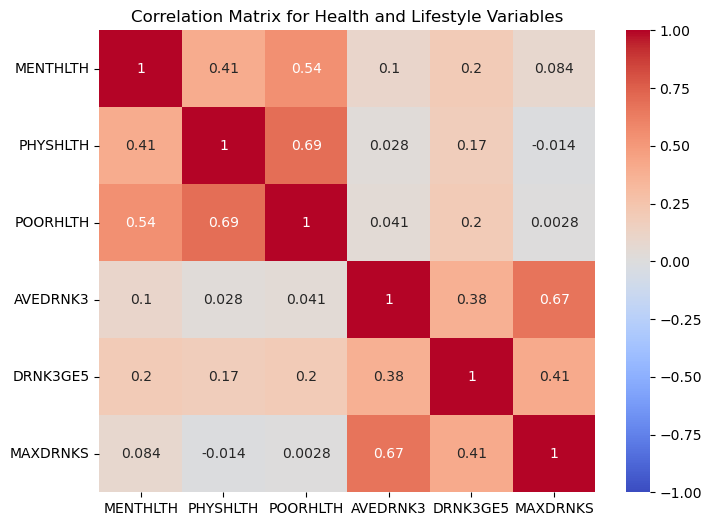

In [27]:
# Selecting numeric columns for correlation
numeric_columns = ['MENTHLTH', 'PHYSHLTH', 'POORHLTH', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS']
corr_matrix = cleaned_df[numeric_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Health and Lifestyle Variables')
plt.show()

/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_95776/851375054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette=palette, order=order)  # Pass the palette and order
/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_95776/851375054.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = data.groupby(x)[y].mean().reindex(order)


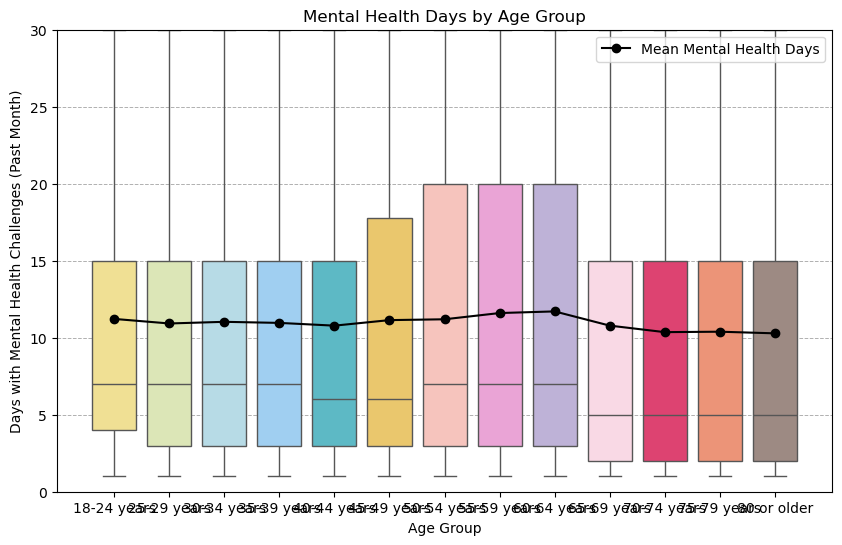

In [30]:
# Function to plot boxplot with custom color palette and trend line for means
def enhanced_boxplot(data, x, y, title, xlabel, ylabel, palette=None, order=None):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x, y=y, data=data, palette=palette, order=order)  # Pass the palette and order

    # Calculate and plot mean trend line if order is provided (for ordinal data)
    if order:
        means = data.groupby(x)[y].mean().reindex(order)
        plt.plot(range(len(order)), means, color='black', marker='o', linestyle='-', label='Mean Mental Health Days')

    # Set y-axis limits and add grid, title, labels, and legend
    plt.ylim(0, 30)
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Example usage with an ordinal variable and custom color palette (age groups)
age_order = [
    '18-24 years', '25-29 years', '30-34 years', '35-39 years', '40-44 years',
    '45-49 years', '50-54 years', '55-59 years', '60-64 years', '65-69 years',
    '70-74 years', '75-79 years', '80 or older'
]

enhanced_boxplot(
    data=cleaned_df,
    x= '_AGEG5YR',
    y='MENTHLTH',
    title='Mental Health Days by Age Group',
    xlabel='Age Group',
    ylabel='Days with Mental Health Challenges (Past Month)',
    palette=age_palette,  # Dictionary-based palette for age groups
    order=age_order  # Specify the order for age categories
)


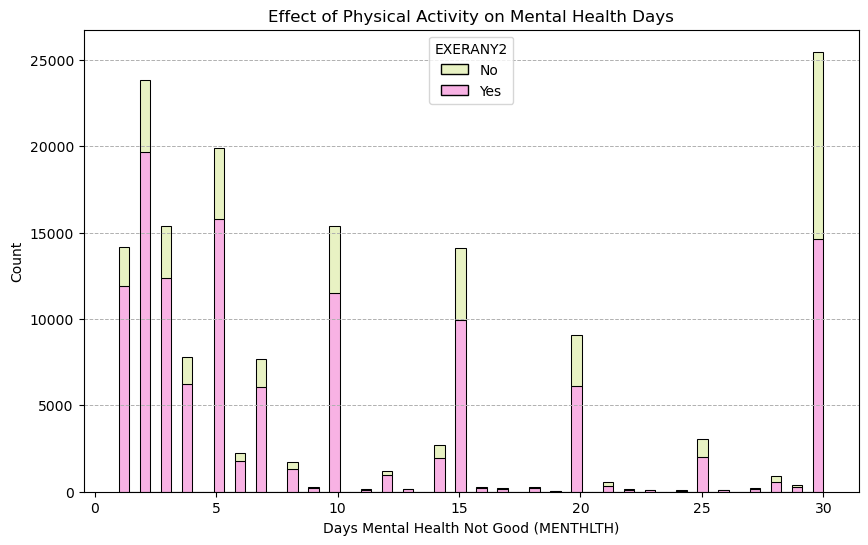

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_df, x='MENTHLTH', hue='EXERANY2', multiple='stack', palette=boolean_colors)
plt.title('Effect of Physical Activity on Mental Health Days')
plt.xlabel('Days Mental Health Not Good (MENTHLTH)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_95776/407230113.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='EMPLOY1', y='MENTHLTH', data=cleaned_df, palette=employ_palette)


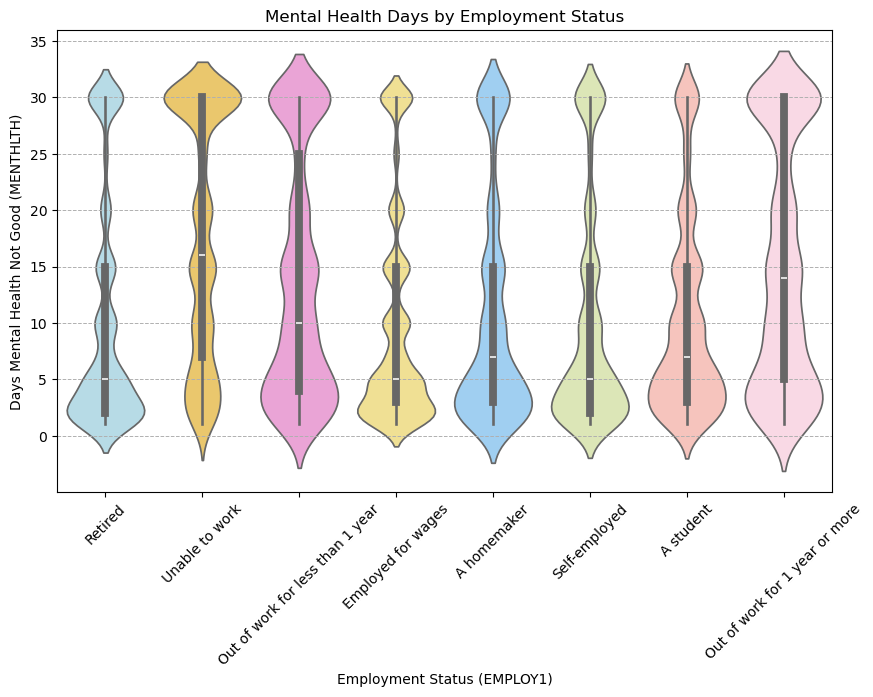

In [36]:
# Updated color palette for all employment status categories
employ_palette = {
    'Employed for wages': "#FFEA85",   # Pineapple Soda
    'Self-employed': "#E1EEAF",        # Palm Leaf
    'Out of work for less than 1 year': "#F698DB",  # Berry Pop
    'Out of work for 1 year or more': "#FFD3E4",    # Cherry Blossom
    'A homemaker': "#92D1FF",          # Pool Day
    'A student': "#FFBDB4",            # Peach Smoothie
    'Retired': "#AFDFEE",              # Blue Lagoon
    'Unable to work': "#FFD058"        # Lemonade Stand
}

plt.figure(figsize=(10, 6))
sns.violinplot(x='EMPLOY1', y='MENTHLTH', data=cleaned_df, palette=employ_palette)
plt.title('Mental Health Days by Employment Status')
plt.xlabel('Employment Status (EMPLOY1)')
plt.ylabel('Days Mental Health Not Good (MENTHLTH)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


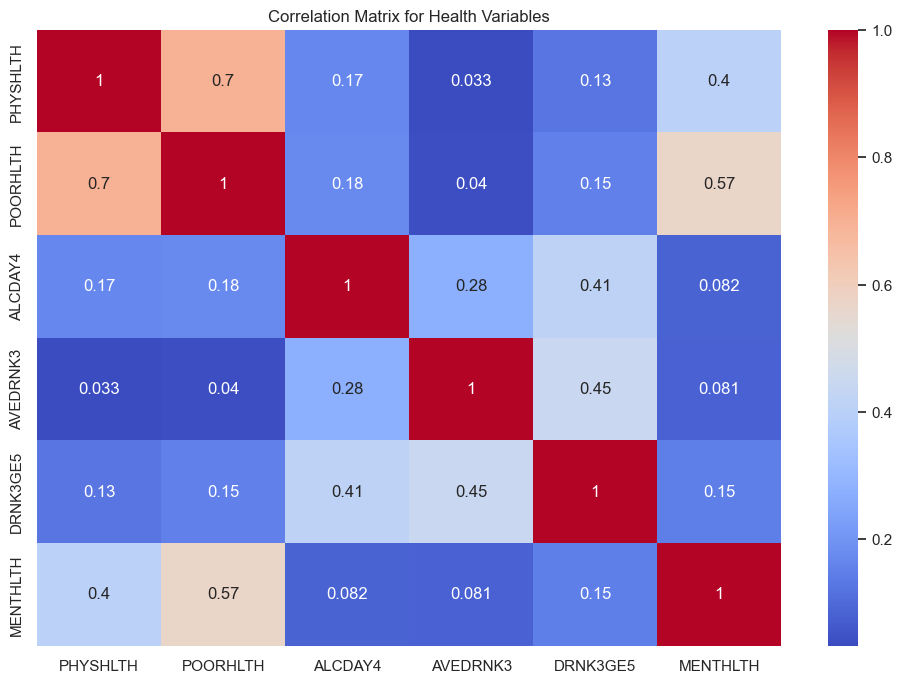

In [ ]:
# Heatmap for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Health Variables')
plt.show()


In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ANOVA for mental health days across different levels of general health (GENHLTH)
anova_result = stats.f_oneway(cleaned_df[cleaned_df['GENHLTH'] == 1]['MENTHLTH'],
                              cleaned_df[cleaned_df['GENHLTH'] == 2]['MENTHLTH'],
                              cleaned_df[cleaned_df['GENHLTH'] == 3]['MENTHLTH'])
print("ANOVA result for GENHLTH:", anova_result)

# Correlation test between Alcohol Consumption (ALCDAY4) and Mental Health Days (MENTHLTH)
corr, p_val = stats.pearsonr(cleaned_df['ALCDAY4'], cleaned_df['MENTHLTH'])
print("Correlation between ALCDAY4 and MENTHLTH:", corr, "p-value:", p_val)

# Linear Regression Model with MENTHLTH as the dependent variable
model = smf.ols('MENTHLTH ~ GENHLTH + EDUCA + _TOTINDA + ALCDAY4', data=cleaned_df).fit()
print(model.summary())


/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_91061/951612058.py:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_result = stats.f_oneway(cleaned_df[cleaned_df['GENHLTH'] == 1]['MENTHLTH'],


ANOVA result for GENHLTH: F_onewayResult(statistic=nan, pvalue=nan)
Correlation between ALCDAY4 and MENTHLTH: nan p-value: nan
                            OLS Regression Results                            
Dep. Variable:               MENTHLTH   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     2257.
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        01:52:11   Log-Likelihood:            -6.1071e+05
No. Observations:              167163   AIC:                         1.221e+06
Df Residuals:                  167150   BIC:                         1.222e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          

In [ ]:
# Contingency table for mental health category vs general health

contingency_table = pd.crosstab(cleaned_df['MENTHLTH_cat'], cleaned_df['GENHLTH'])
print(contingency_table)

GENHLTH       Excellent   Fair   Good  Poor  Very good
MENTHLTH_cat                                          
Low               12803  15452  37874  3714      38589
Medium             1739   7141  10250  2586       6544
High               1584   9481   9018  6407       4609


In [ ]:


# Example: ANOVA for mental health across levels of general health (GENHLTH)
anova_result = stats.f_oneway(
    cleaned_df[cleaned_df['GENHLTH'] == 1]['MENTHLTH'],
    cleaned_df[cleaned_df['GENHLTH'] == 2]['MENTHLTH'],
    cleaned_df[cleaned_df['GENHLTH'] == 3]['MENTHLTH'],
    cleaned_df[cleaned_df['GENHLTH'] == 4]['MENTHLTH'],
    cleaned_df[cleaned_df['GENHLTH'] == 5]['MENTHLTH']
)
print("ANOVA result for GENHLTH:", anova_result)

# Example: t-test for mental health based on exercise status (EXERANY2)
ttest_result = stats.ttest_ind(
    cleaned_df[cleaned_df['EXERANY2'] == 1]['MENTHLTH'],
    cleaned_df[cleaned_df['EXERANY2'] == 2]['MENTHLTH']
)
print("T-test result for EXERANY2:", ttest_result)


ANOVA result for GENHLTH: F_onewayResult(statistic=nan, pvalue=nan)
T-test result for EXERANY2: TtestResult(statistic=nan, pvalue=nan, df=nan)


/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_91061/3768852311.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_result = stats.f_oneway(
/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_91061/3768852311.py:14: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_result = stats.ttest_ind(


In [ ]:
# Categorize MENTHLTH into bins
cleaned_df['MENTHLTH_cat'] = pd.cut(cleaned_df['MENTHLTH'], bins=[0, 10, 20, 100], labels=['Low', 'Medium', 'High'])

# Contingency table for mental health category vs smoking status
contingency_table = pd.crosstab(cleaned_df['MENTHLTH_cat'], cleaned_df['SMOKE100'])

# Chi-square test
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print("Chi-square test for MENTHLTH and SMOKE100:", chi2, p)


Chi-square test for MENTHLTH and SMOKE100: 3009.026514808543 0.0
